<a href="https://colab.research.google.com/github/m-kanuri/m-kanuri.github.io/blob/main/Unit02_AutoMPG_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auto MPG EDA

There are a lot of ways to reach these goals as follows:

1. Import the data

2. Get a feel of the data ,describe the data,look at a sample of data like first and last rows

3. Take a deeper look into the data by querying or indexing the data

4. Identify features of interest

5. Recognise the challenges posed by data - missing values, outliers

6. Discover patterns in the data



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [5]:
auto_mpg = pd.read_csv("auto-mpg.csv")

In [6]:
auto_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Now that you have got a general idea about your data set, it’s also a good idea to take a closer look at the data itself. With the help of the head() and tail() functions of the Pandas library, you can easily check out the first and last lines of your DataFrame, respectively.

Let us look at some sample data

In [7]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
auto_mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [10]:
auto_mpg.shape

(398, 9)

Let us examine numerical features in the train dataset

In [11]:
numeric_features = auto_mpg.select_dtypes(include=[np.number])

numeric_features.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

Let us examine categorical features in the train dataset

In [12]:

categorical_features = auto_mpg.select_dtypes(include=[object])

categorical_features.columns

Index(['horsepower', 'car name'], dtype='object')

Visualising missing values for a sample of 250

<Axes: >

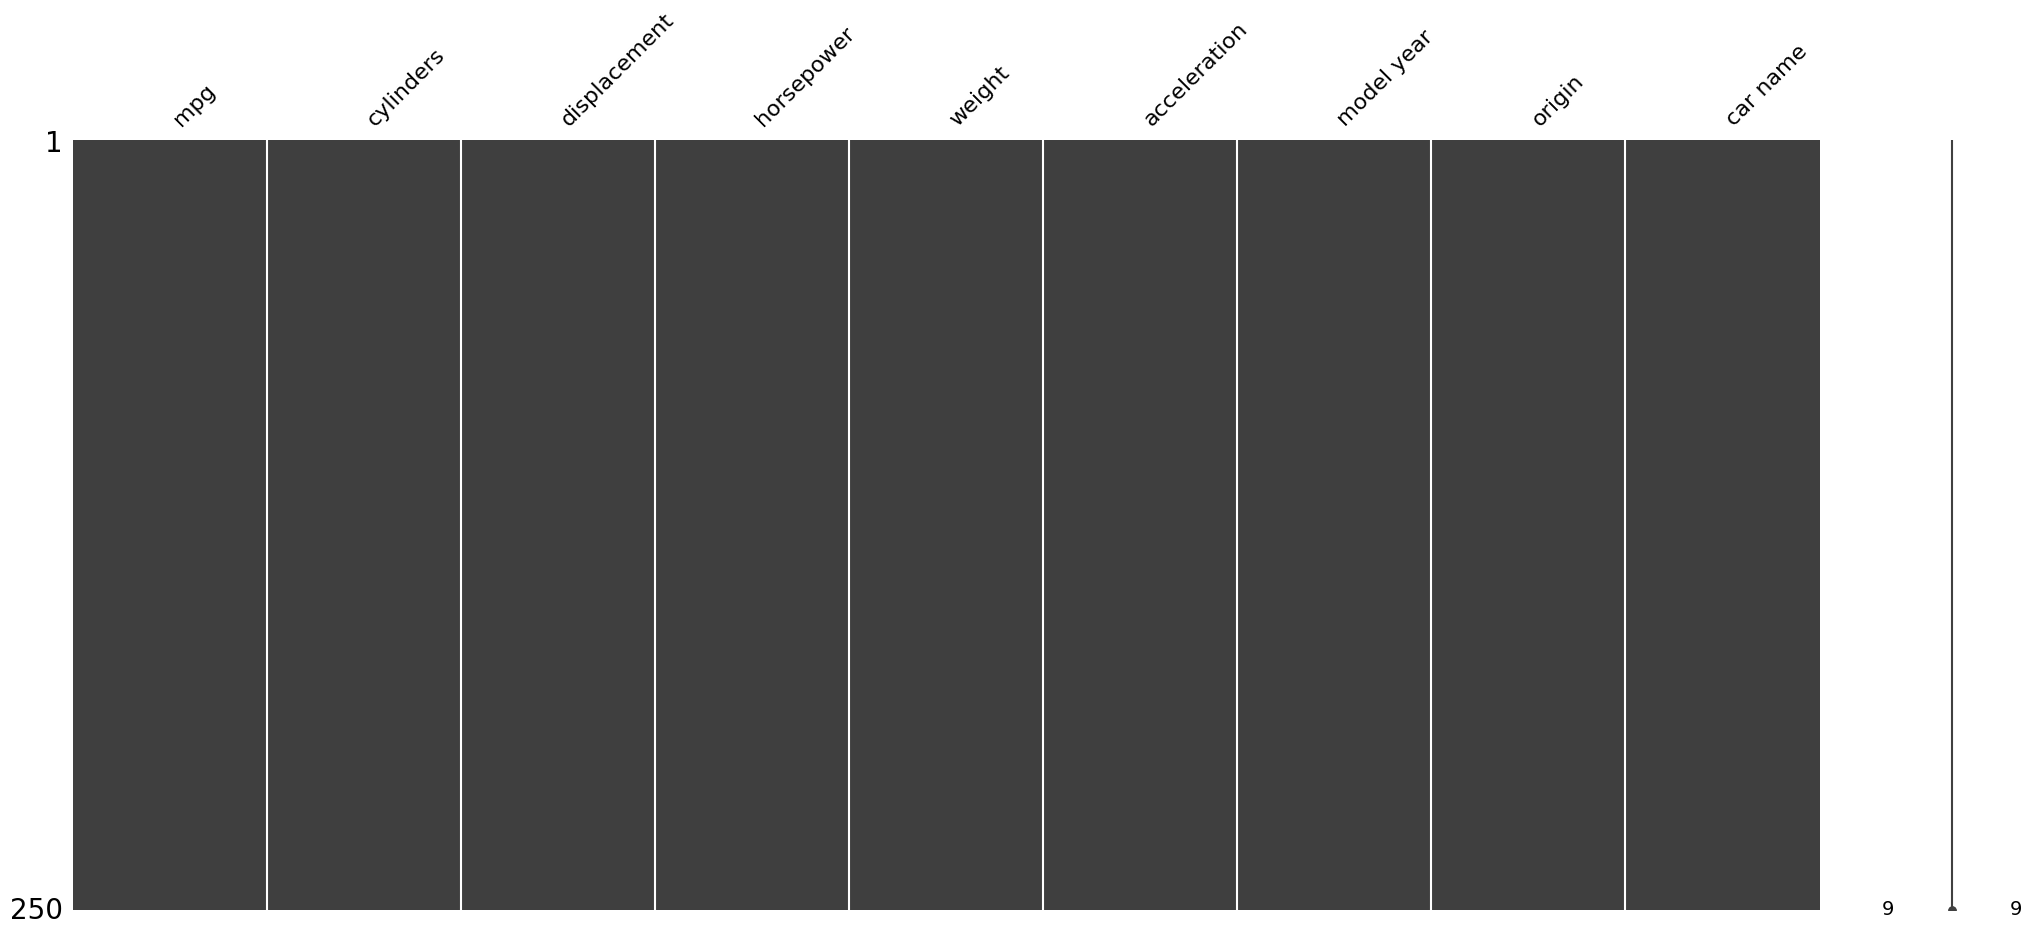

In [14]:
msno.matrix(auto_mpg.sample(250))

#### Heatmap

The **missingno** correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

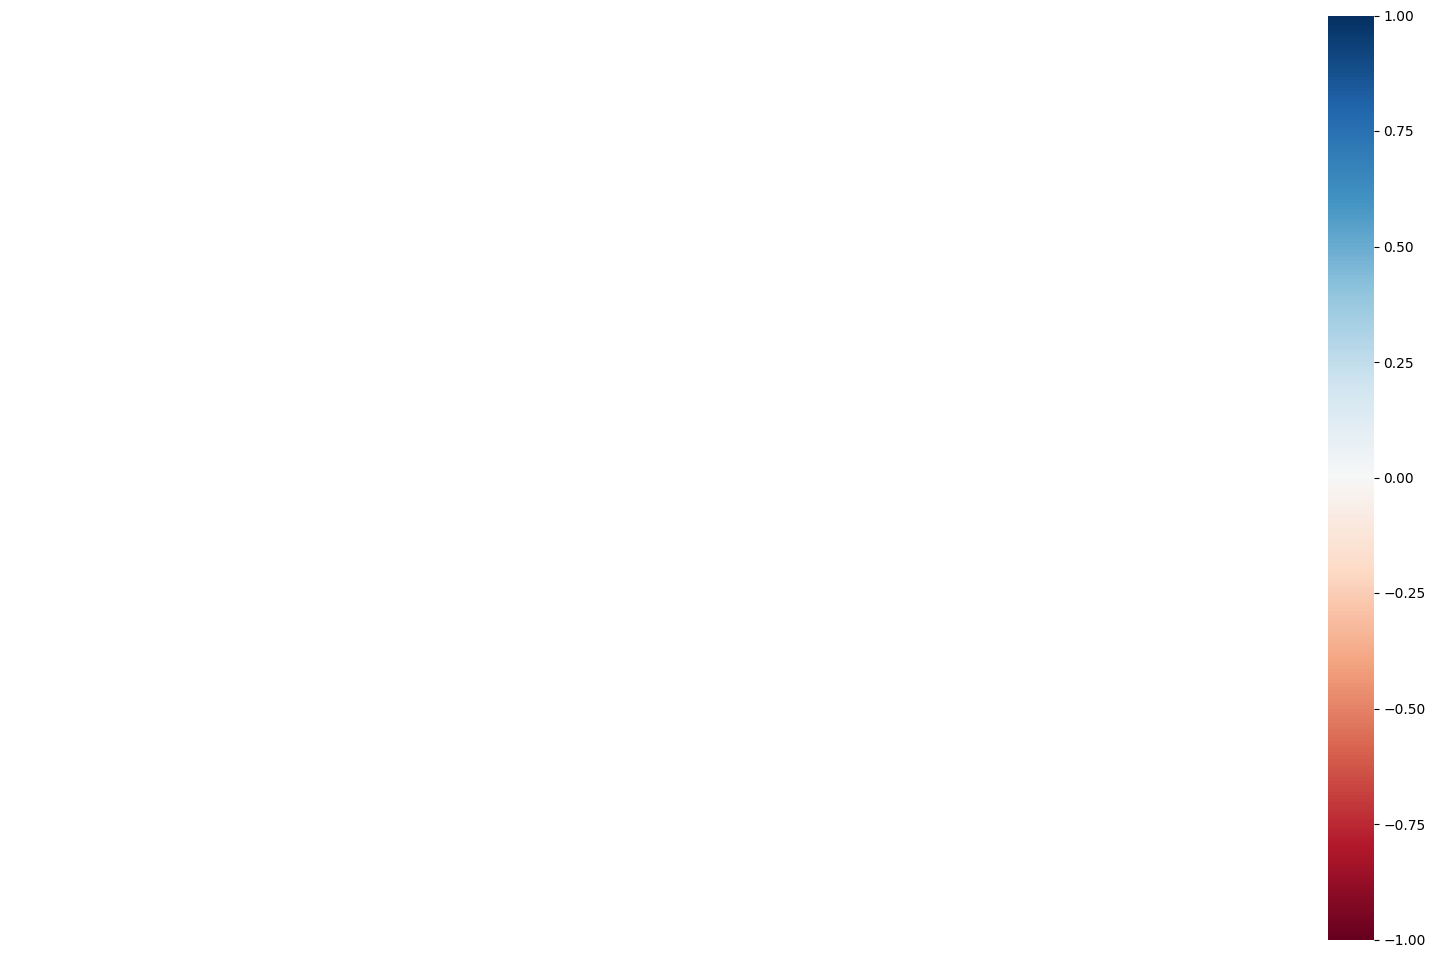

In [16]:
msno.heatmap(auto_mpg)

<Axes: >

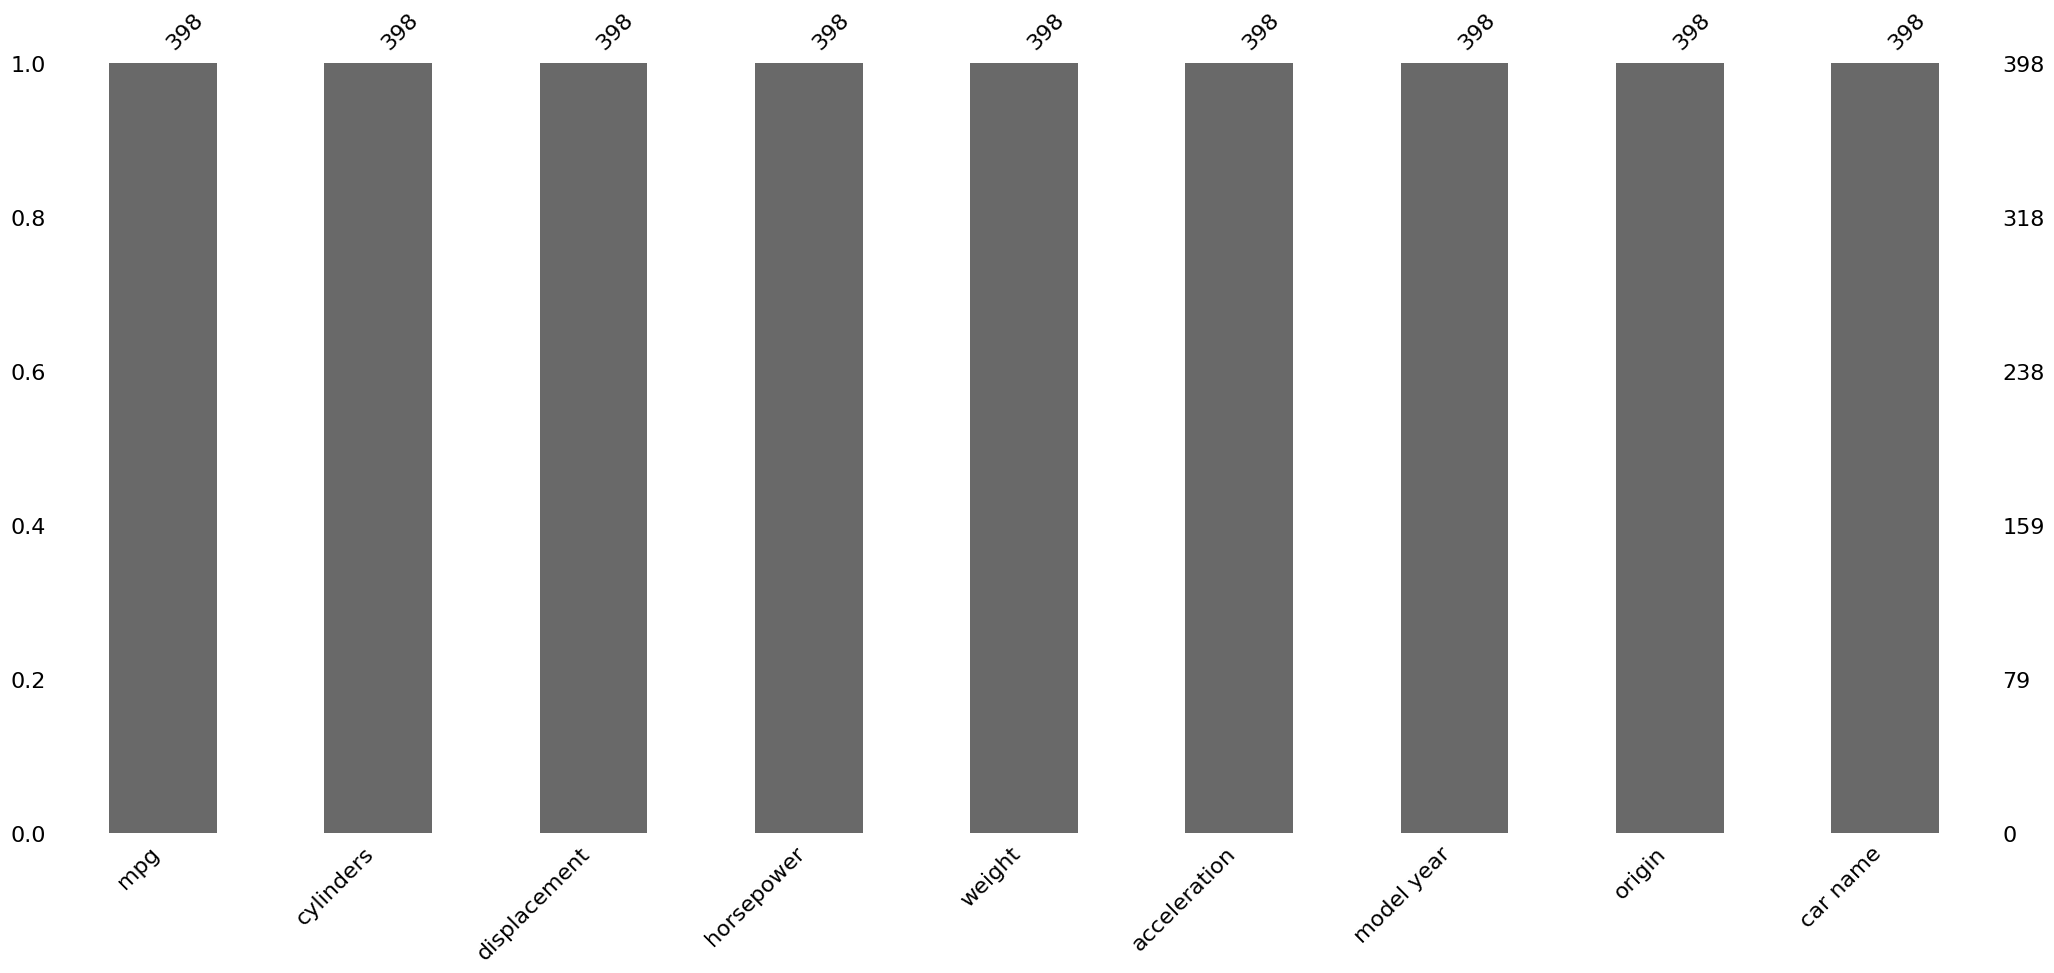

In [17]:
msno.bar(auto_mpg)

#### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

/usr/local/lib/python3.11/dist-packages/scipy/cluster/hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

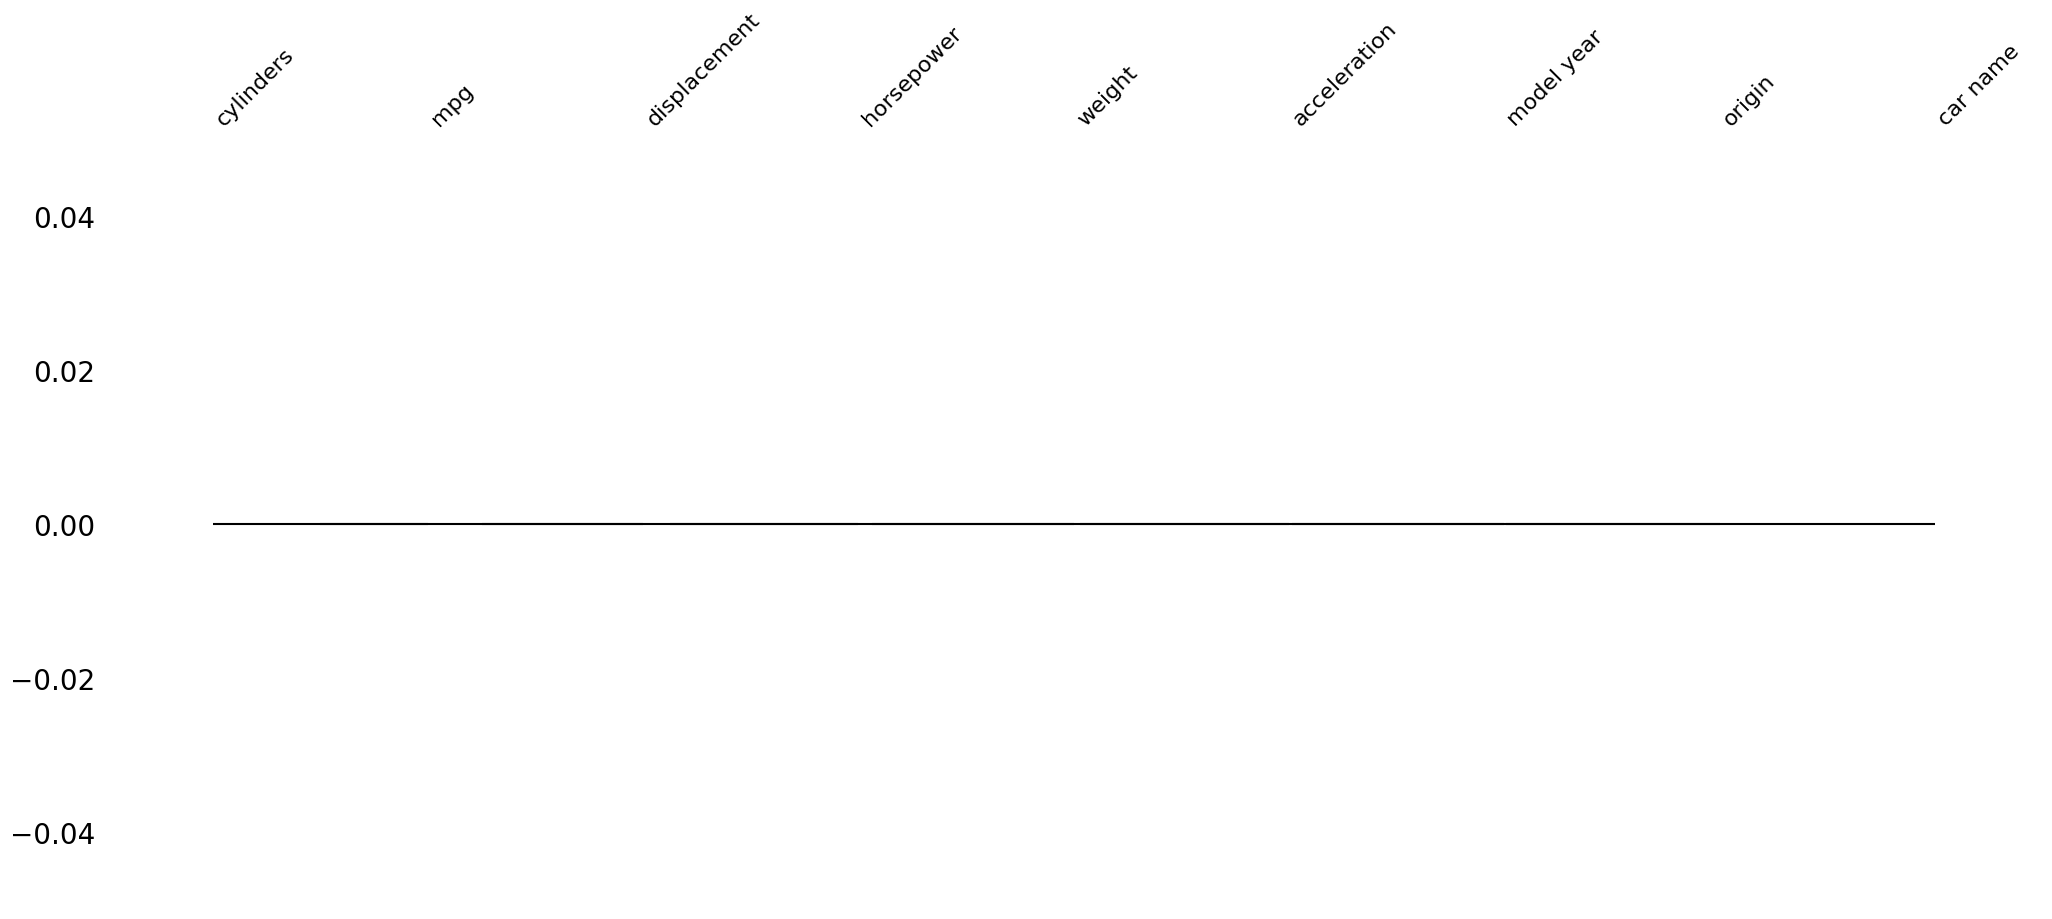

In [18]:
msno.dendrogram(auto_mpg)

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity , then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

**The Challenges of Your Data**

Now that we have gathered some basic information on your data, it’s a good idea to just go a little bit deeper into the challenges that the data might pose.

There are two factors mostly observed in EDA exercise which are **missing values** and **outliers**
For understanding in detail on how to handle missing values in detail please visit
https://www.kaggle.com/pavansanagapati/simple-tutorial-on-how-to-handle-missing-data
For determining the outliers boxplot is used in the later part of this kernel

**Estimate Skewness and Kurtosis**

In [19]:
numeric_features.skew(), numeric_features.kurt()


(mpg             0.457066
 cylinders       0.526922
 displacement    0.719645
 weight          0.531063
 acceleration    0.278777
 model year      0.011535
 origin          0.923776
 dtype: float64,
 mpg            -0.510781
 cylinders      -1.376662
 displacement   -0.746597
 weight         -0.785529
 acceleration    0.419497
 model year     -1.181232
 origin         -0.817597
 dtype: float64)

<ipython-input-20-56b167070a6f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
<ipython-input-20-56b167070a6f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.norm)
<ipython-input-20-56b167070a6f>:7: UserWarning: 

`distplot` is a deprecate

<Axes: title={'center': 'Log Normal'}, xlabel='mpg'>

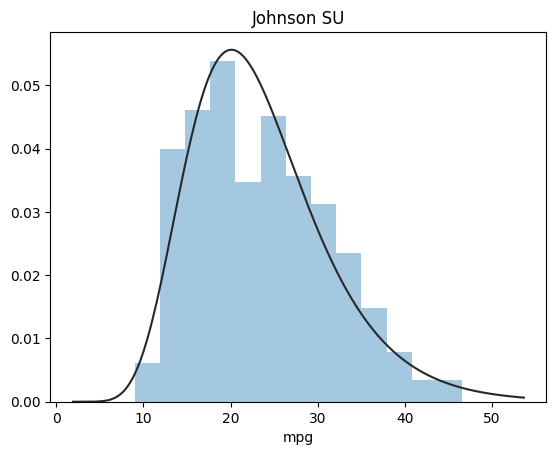

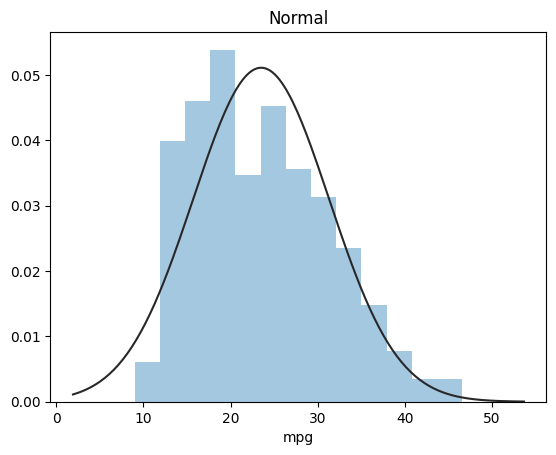

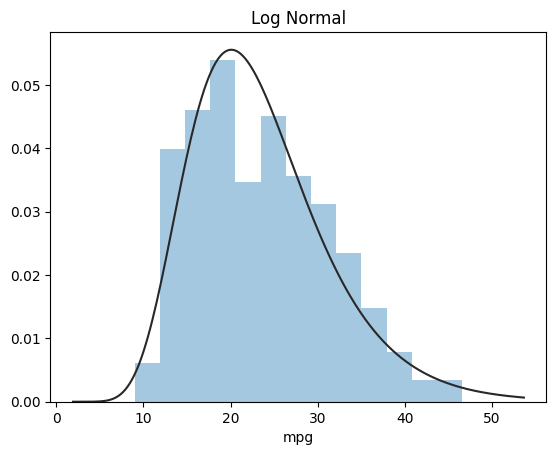

In [20]:
y = auto_mpg['mpg']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

<ipython-input-21-ee9b93d4f85a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_features.skew(),color='blue',axlabel ='Skewness')


Text(0.5, 0, 'Skewness')

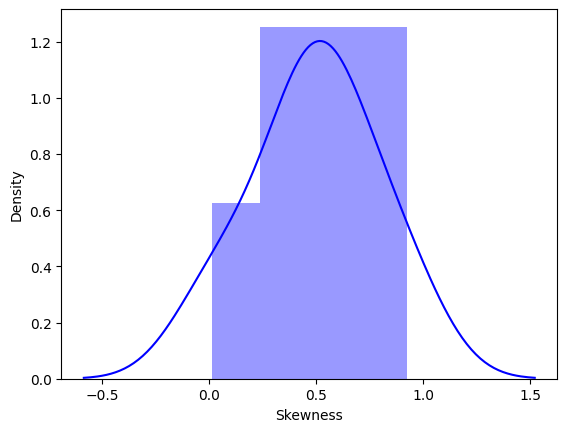

In [21]:
sns.distplot(numeric_features.skew(),color='blue',axlabel ='Skewness')
plt.xlabel('Skewness')

<ipython-input-22-d647993cdb84>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_features.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)


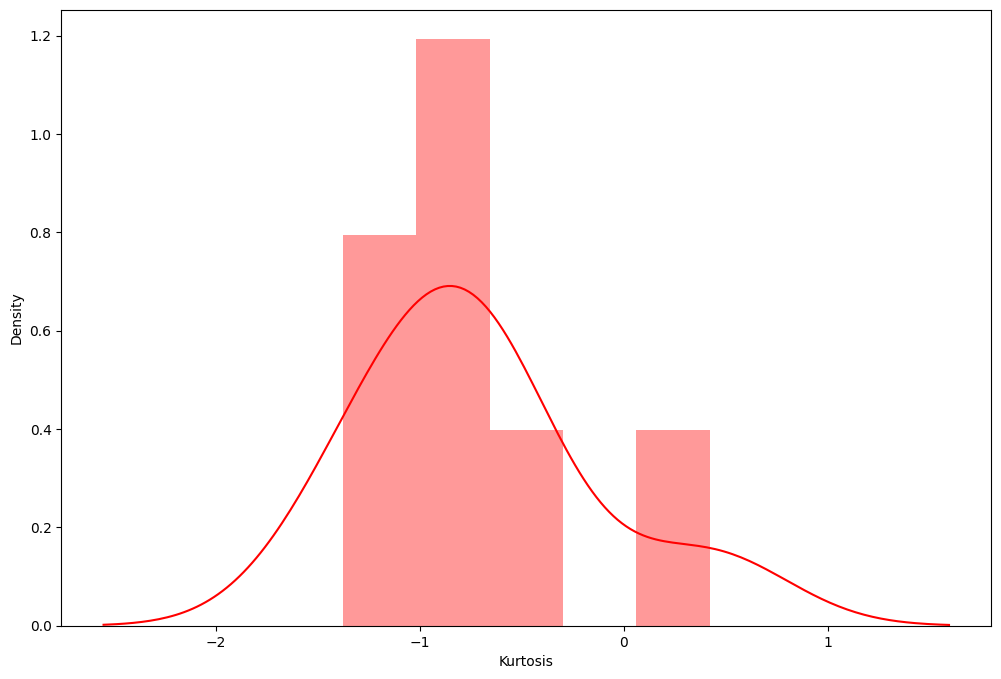

In [22]:
plt.figure(figsize = (12,8))
sns.distplot(numeric_features.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

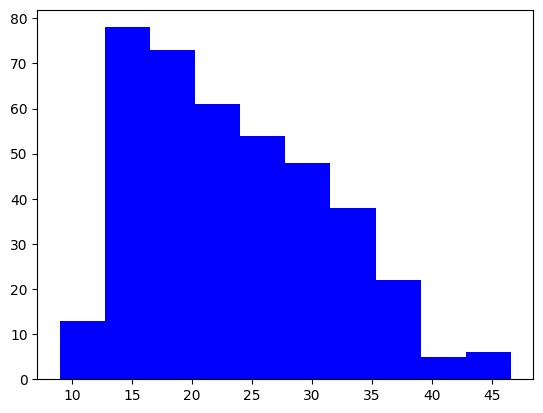

In [23]:
plt.hist(numeric_features['mpg'],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

(array([ 3., 10., 40., 46., 66., 60., 67., 58., 39.,  9.]),
 array([2.19722458, 2.36166217, 2.52609977, 2.69053737, 2.85497496,
        3.01941256, 3.18385016, 3.34828775, 3.51272535, 3.67716294,
        3.84160054]),
 <BarContainer object of 10 artists>)

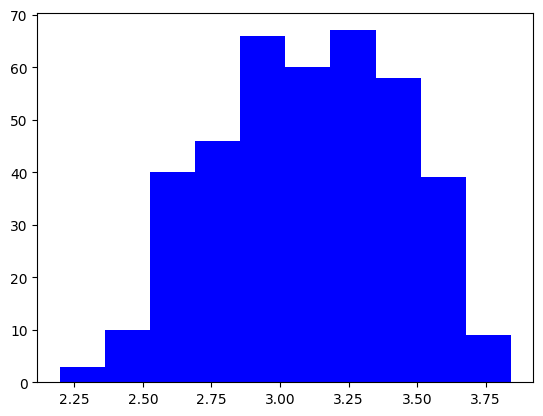

In [24]:
target = np.log(numeric_features['mpg'])
target.skew()
plt.hist(target,color='blue')

Finding Correlation coefficients between numeric features and SalePrice

In [25]:
correlation = numeric_features.corr()
print(correlation['mpg'].sort_values(ascending = False),'\n')

mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64 



To explore further we will start with the following visualisation methods to analyze the data better:

 - Correlation Heat Map
 - Zoomed Heat Map
 - Pair Plot
 - Scatter Plot

### Correlation Heat Map

<Axes: title={'center': 'Correlation of Numeric Features with Sale Price'}>

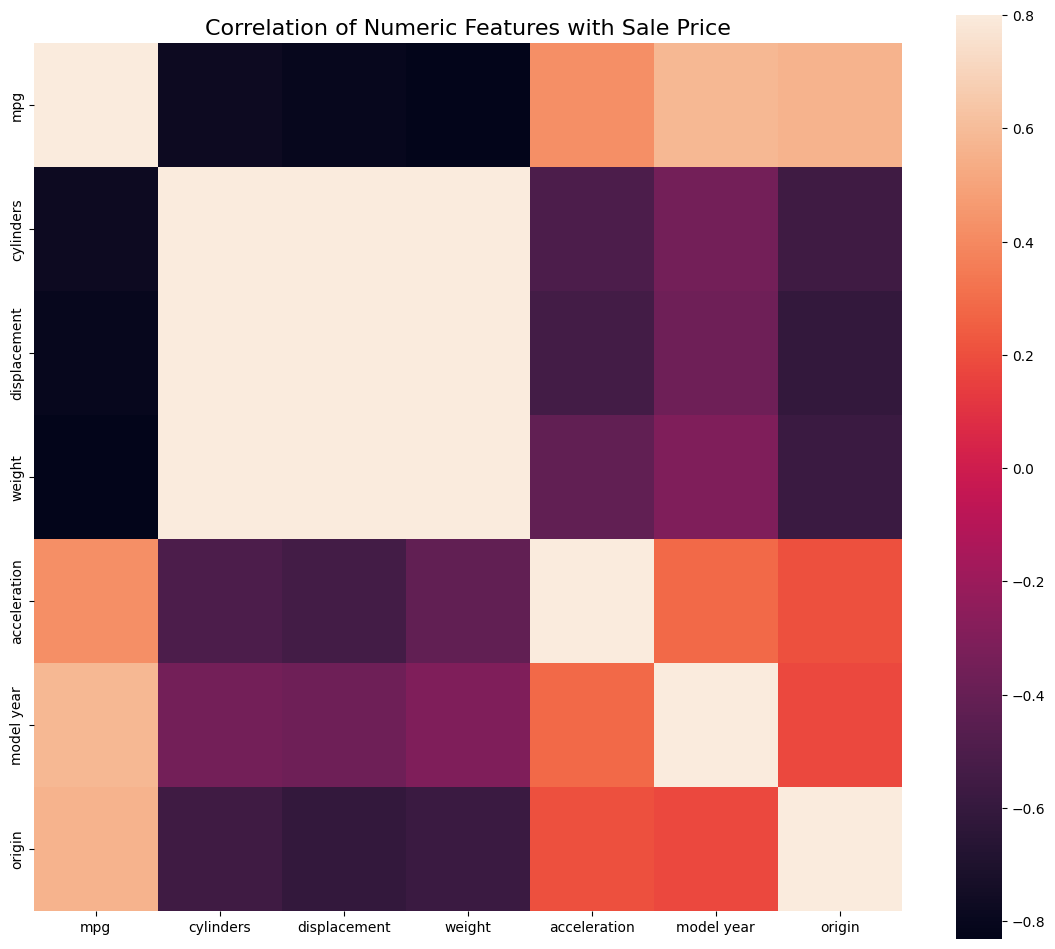

In [26]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

The heatmap is the best way to get a quick overview of correlated features thanks to seaborn!

At initial glance it is observed that there are two red colored squares that get my attention.
1. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables.
2. Second one refers to the 'GarageX' variables.
Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

Heatmaps are great to detect this kind of multicollinearity situations and in problems related to feature selection like this project, it comes as an excellent exploratory tool.

Another aspect I observed here is the 'SalePrice' correlations.As it is observed that 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hello !' to SalePrice, however we cannot exclude the fact that rest of the features have some level of correlation to the SalePrice. To observe this correlation closer let us see it in Zoomed Heat Map

### Zoomed HeatMap

#### SalePrice Correlation matrix

Index(['mpg', 'model year', 'origin', 'acceleration', 'cylinders',
       'displacement', 'weight'],
      dtype='object')


<Axes: >

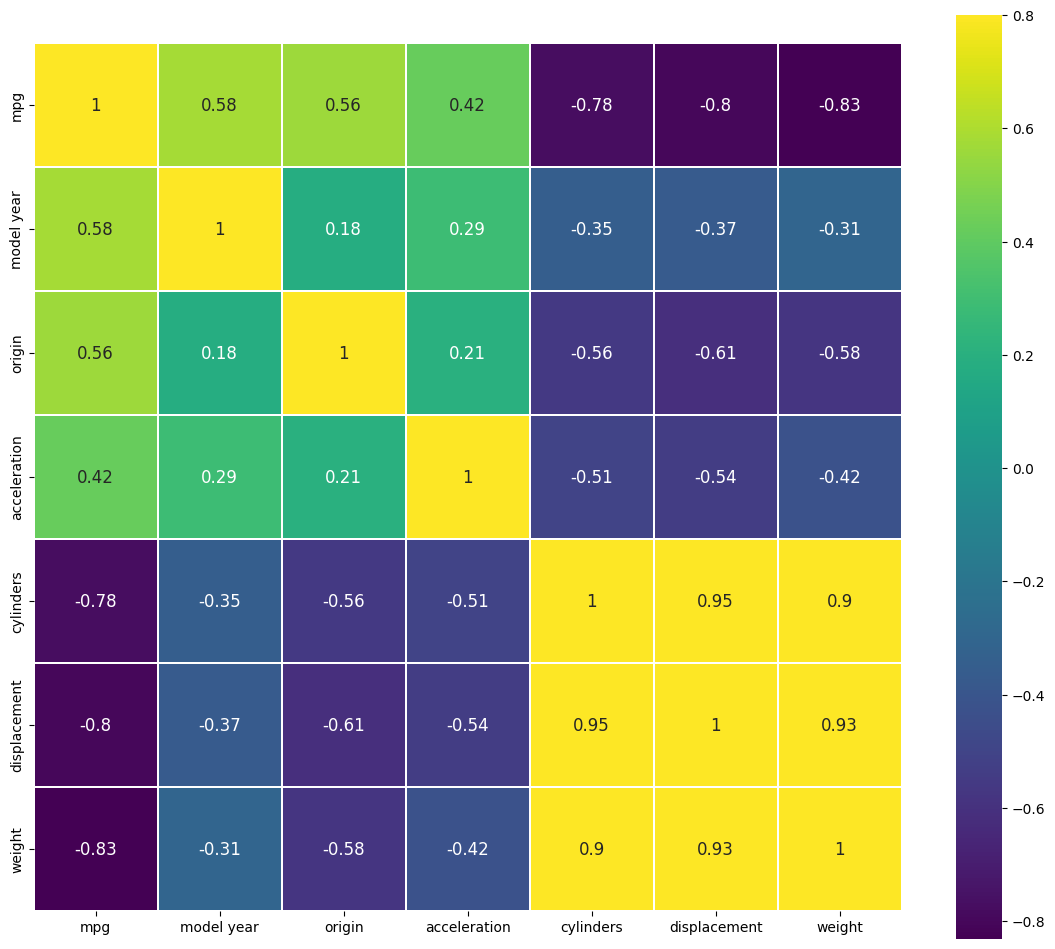

In [27]:
k= 11
cols = correlation.nlargest(k,'mpg')['mpg'].index
print(cols)
cm = np.corrcoef(numeric_features[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

From above zoomed heatmap it is observed that GarageCars & GarageArea are closely correlated .
Similarly TotalBsmtSF and 1stFlrSF are also closely correlated.


My observations :
- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
- 'GarageCars' and 'GarageArea' are strongly correlated variables. It is because the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. So it is hard to distinguish between the two. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be twins. In this case let us keep 'TotalBsmtSF'
- 'TotRmsAbvGrd' and 'GrLivArea', twins
- 'YearBuilt' it appears like is slightly correlated with 'SalePrice'. This required more analysis to arrive at a conclusion may be do some time series analysis.

### Pair Plot

#### Pair Plot between 'SalePrice' and correlated variables

Visualisation of 'OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd' features
with respect to SalePrice in the form of pair plot & scatter pair plot for better understanding.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


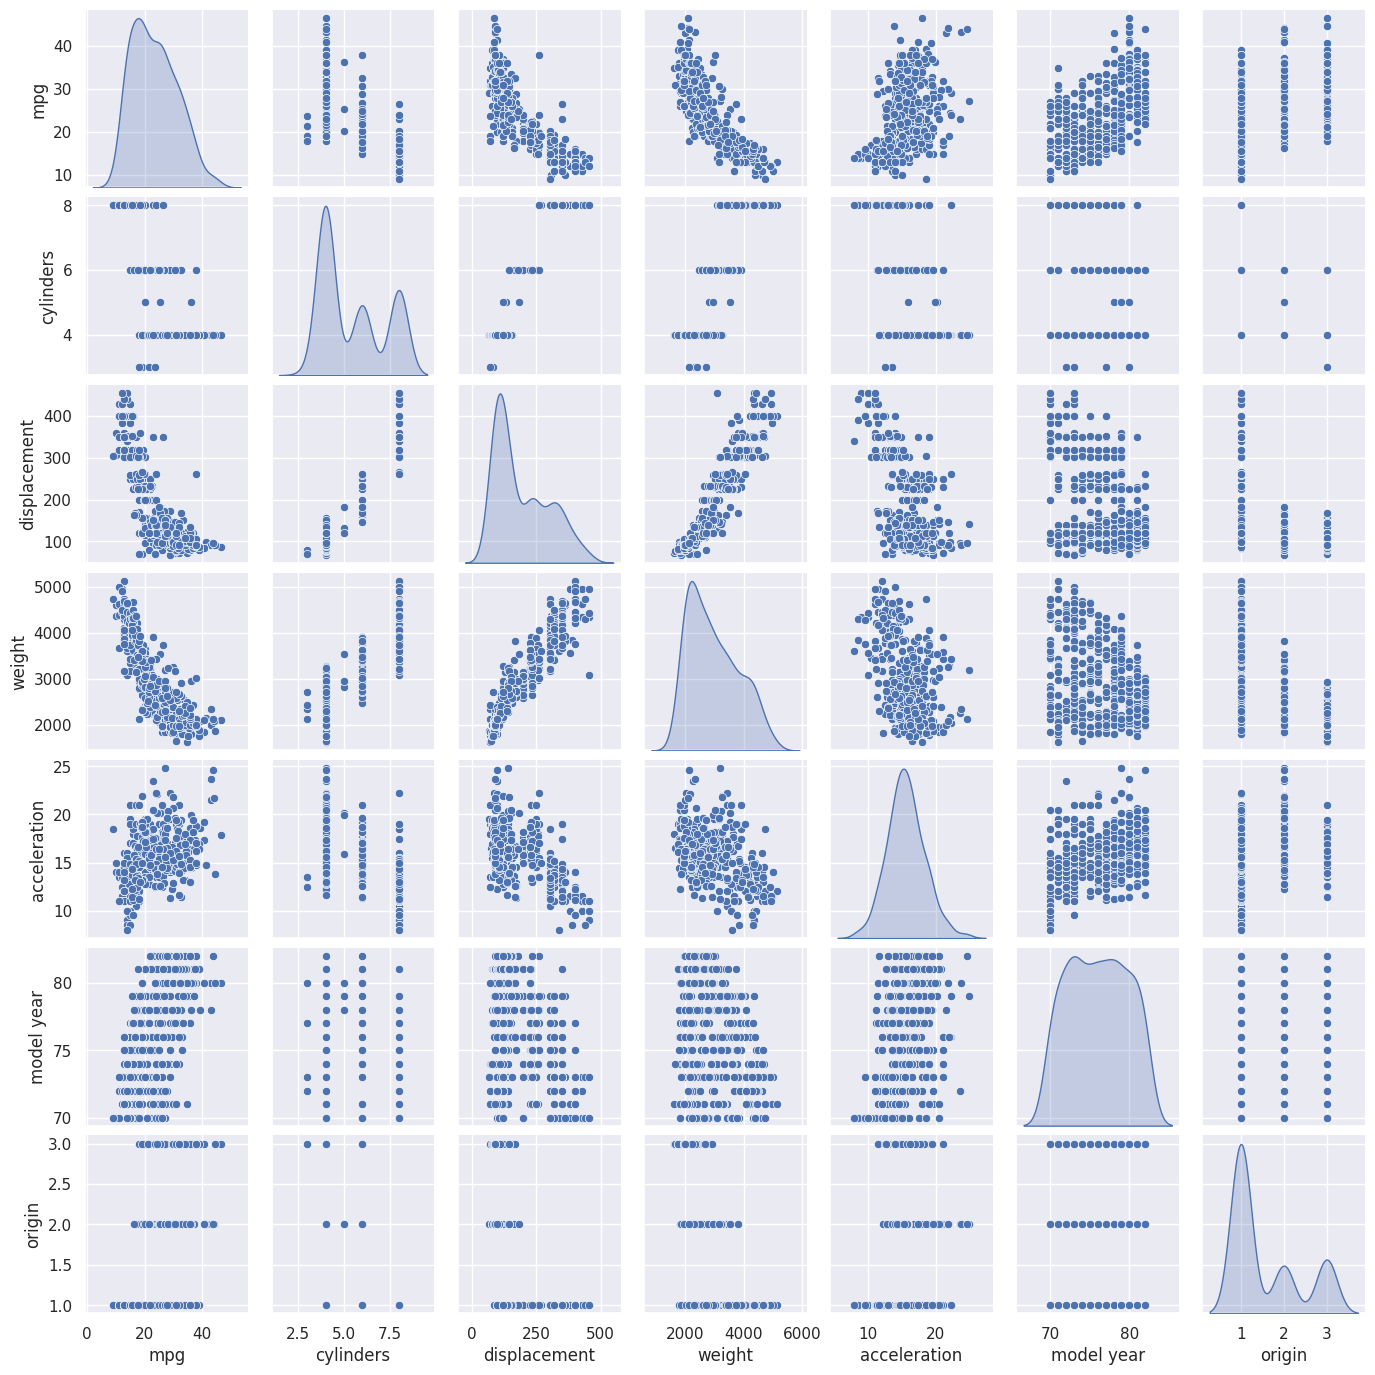

In [28]:
sns.set()
sns.pairplot(numeric_features,size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Although we already know some of the main figures, this pair plot gives us a reasonable overview insight about the correlated features .Here are some of my analysis.

- One interesting observation is between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.

- One more interesting observation is between 'SalePrice' and 'YearBuilt'. In the bottom of the 'dots cloud', we see what almost appears to be a exponential function.We can also see this same tendency in the upper limit of the 'dots cloud'
- Last observation is that prices are increasing faster now with respect to previous years.

### Scatter Plot

#### Scatter plots between the most correlated variables

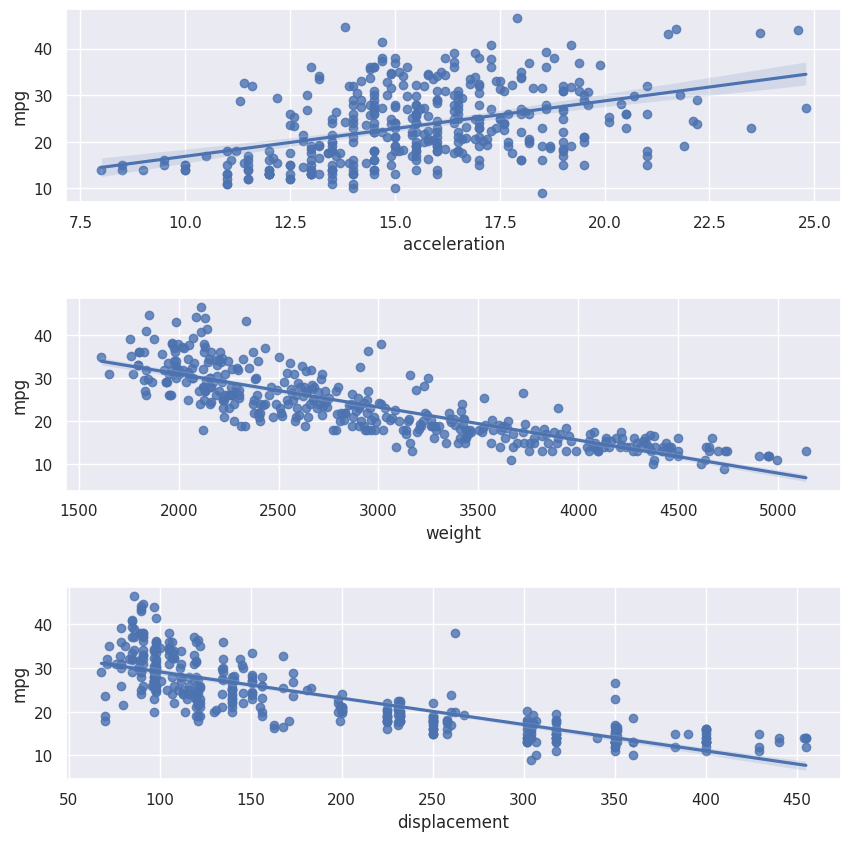

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

acceleration_scatter_plot = pd.concat([numeric_features['mpg'],numeric_features['acceleration']],axis = 1)
sns.regplot(x='acceleration',y = 'mpg',data = acceleration_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

weight_scatter_plot = pd.concat([numeric_features['mpg'],numeric_features['weight']],axis = 1)
sns.regplot(x='weight',y = 'mpg',data = weight_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

displacement_scatter_plot = pd.concat([numeric_features['mpg'],numeric_features['displacement']],axis = 1)
sns.regplot(x='displacement',y = 'mpg',data = displacement_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

plt.subplots_adjust(hspace=0.5) # Adjust hspace for vertical spacing

#### Bar Chart - Acceleration

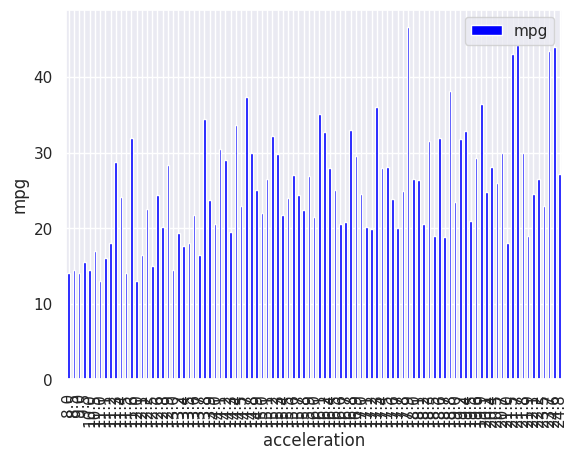

In [30]:
mpg_acceleration= numeric_features.pivot_table(index ='acceleration',values = 'mpg', aggfunc = 'median')
mpg_acceleration.plot(kind = 'bar',color = 'blue')
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.show()

#### Box plot - Acceleration

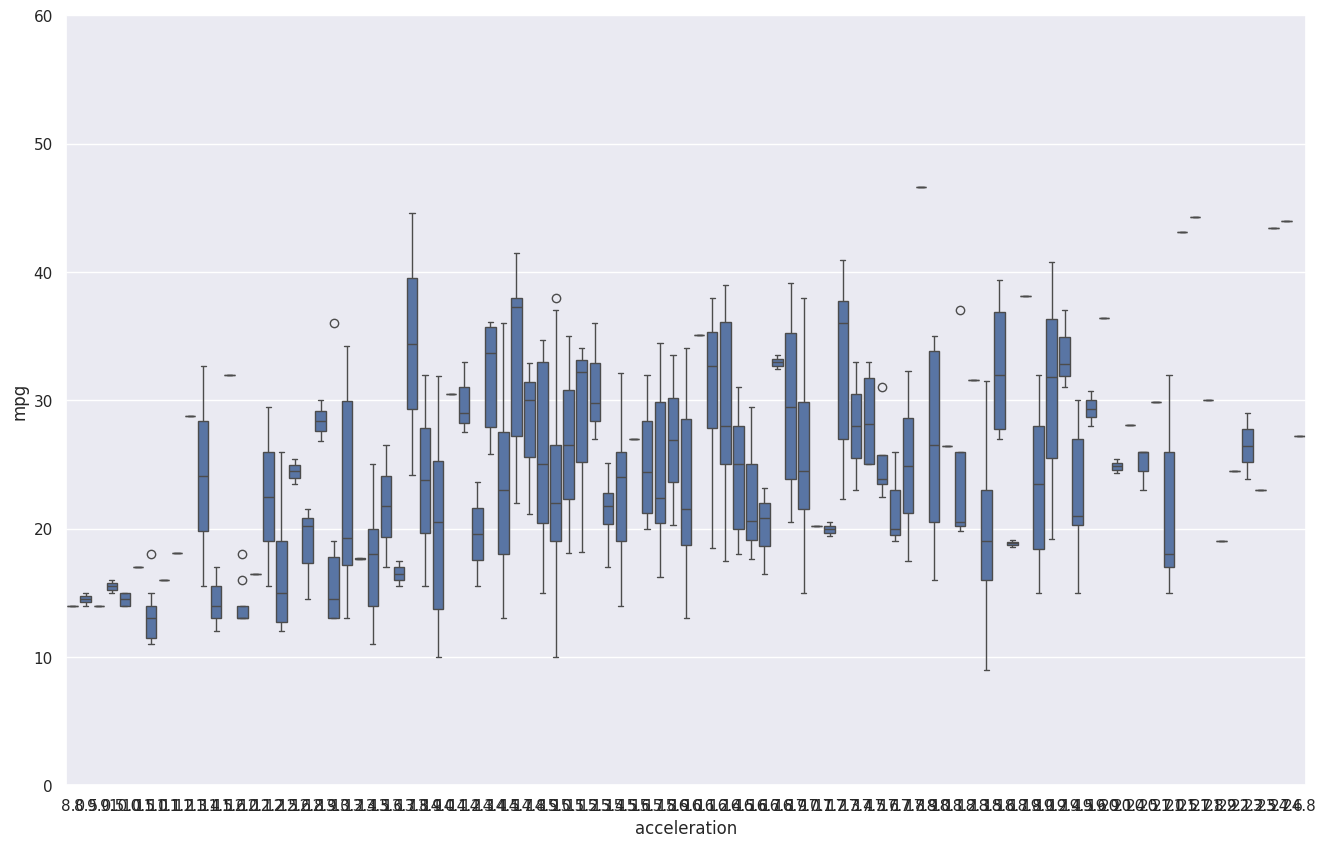

In [31]:
var = 'acceleration'
data = pd.concat([numeric_features['mpg'], numeric_features[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="mpg", data=data)
fig.axis(ymin=0, ymax=60);

#### Box Plot - weight

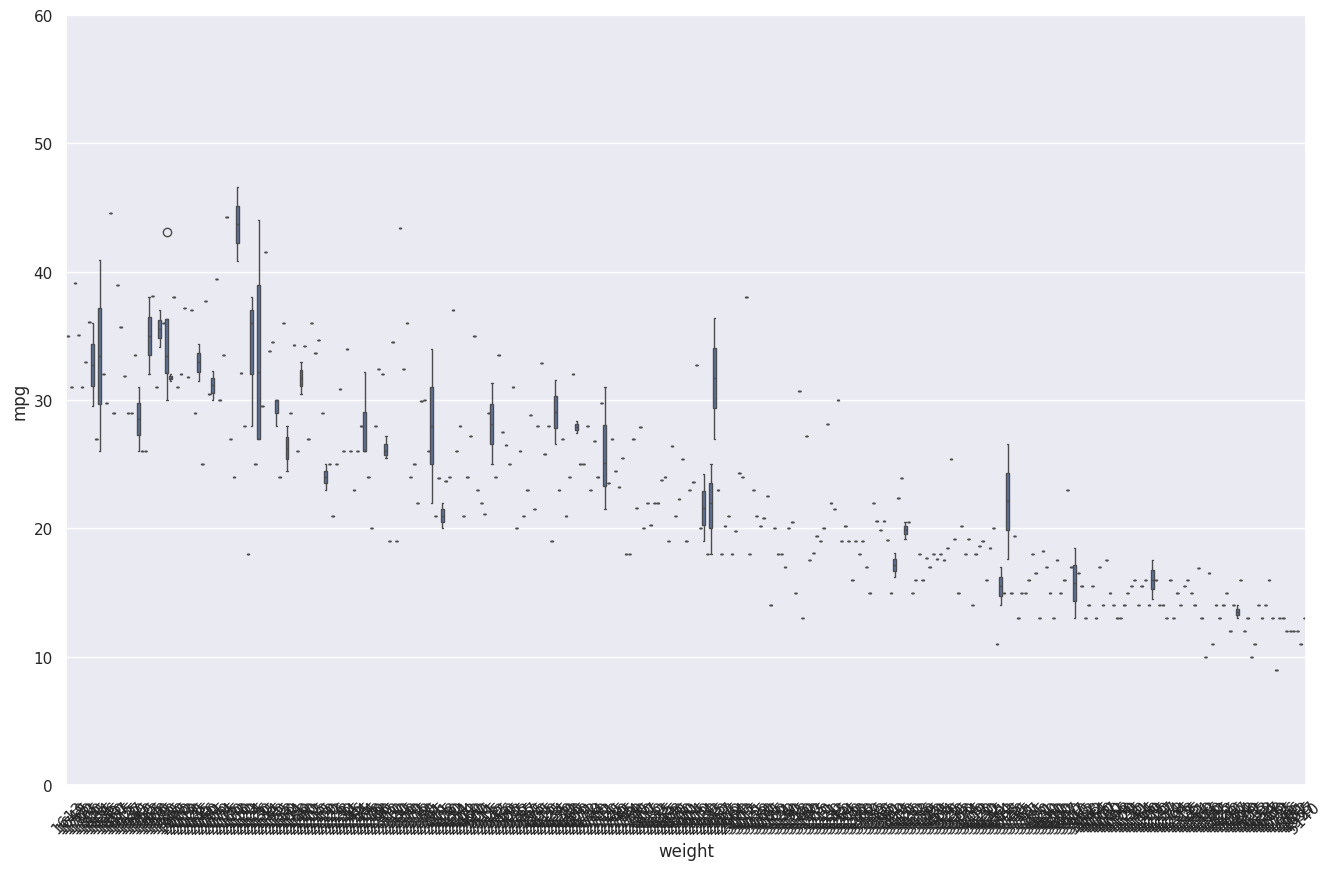

In [32]:
var = 'weight'
data = pd.concat([numeric_features['mpg'], numeric_features[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="mpg", data=data)
fig.axis(ymin=0, ymax=60);
xt = plt.xticks(rotation=45)

Box Plot - Displacement

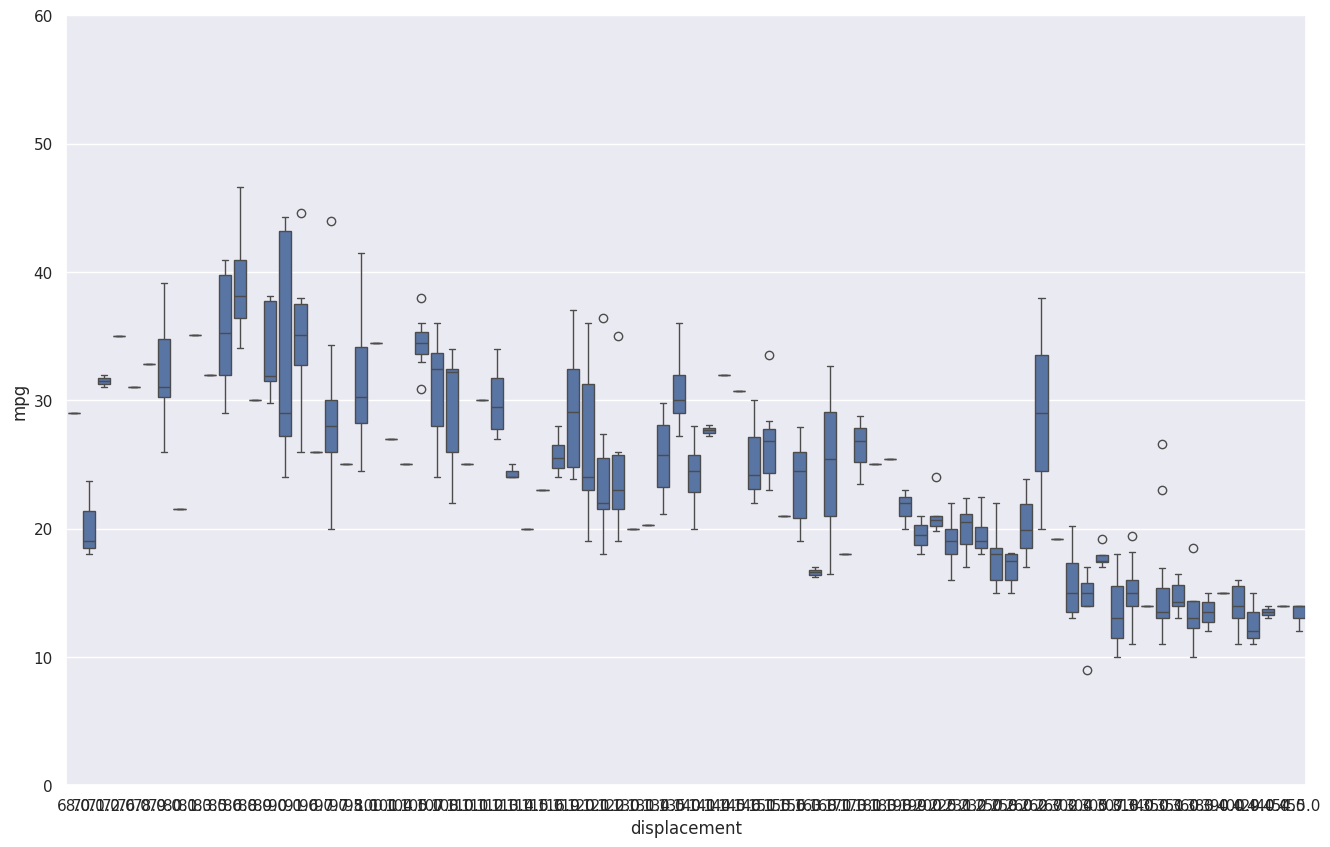

In [33]:
var = 'displacement'
data = pd.concat([numeric_features['mpg'], numeric_features[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="mpg", data=data)
fig.axis(ymin=0, ymax=60);

#### Count Plot - Displacement



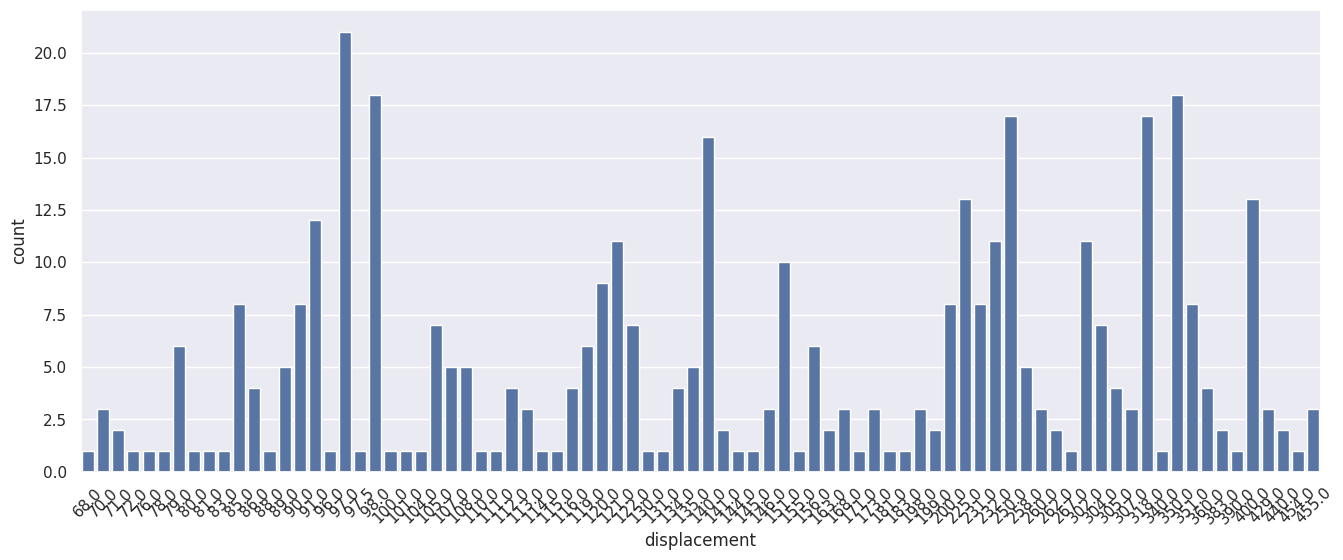

In [34]:
plt.figure(figsize = (16, 6))
sns.countplot(x = 'displacement', data = numeric_features)
xt = plt.xticks(rotation=45)

#### ViolinPlot - Horsepower vs mpg

<Axes: xlabel='horsepower', ylabel='mpg'>

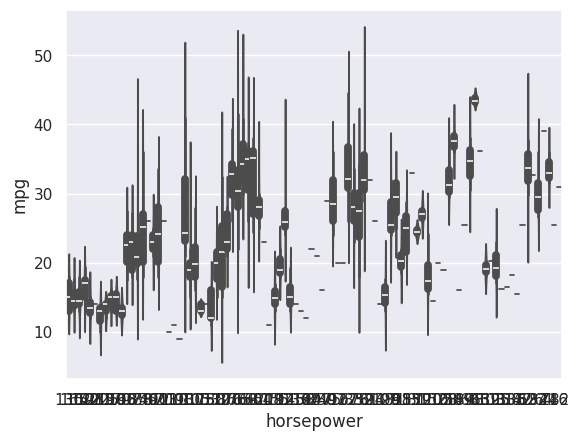

In [44]:
sns.violinplot(x='horsepower', y='mpg', data = auto_mpg)

#### Catplot - Horsepower vs mpg

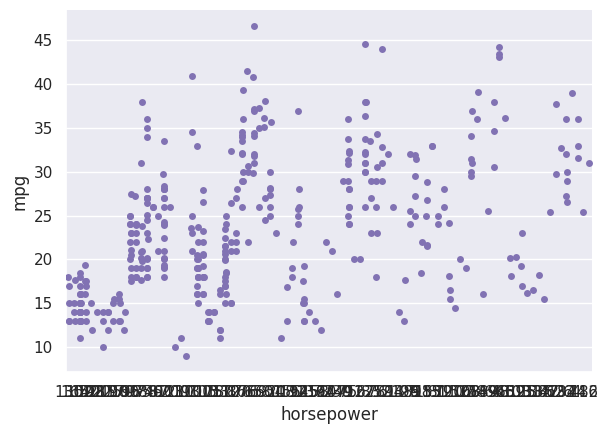

In [43]:
sns.catplot(x='horsepower', y='mpg', data = auto_mpg, color = 'm',
               estimator = np.median, height = 4.5,  aspect=1.35)

#### Facet Grid Plot - Cylinders QC mpg

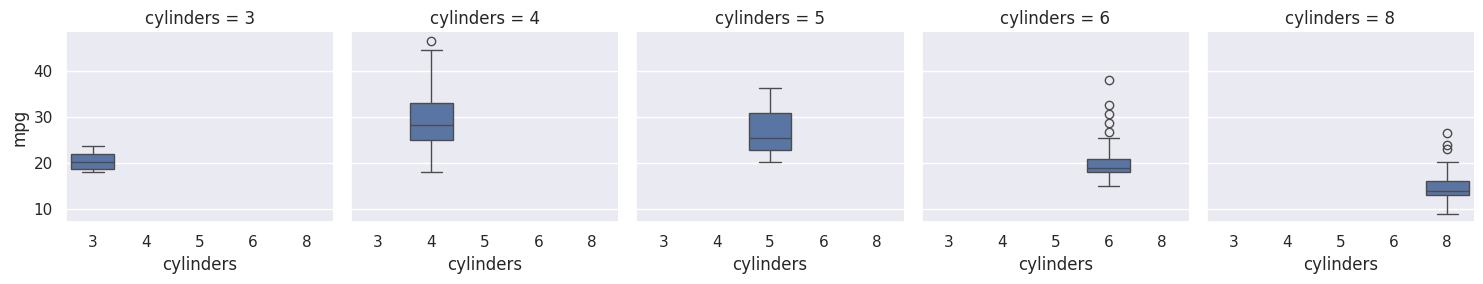

In [42]:
g = sns.FacetGrid(auto_mpg, col = 'cylinders', col_wrap = 5)
g.map(sns.boxplot, 'cylinders', 'mpg', order = [3, 4, 5, 6, 8])

#### PointPlot

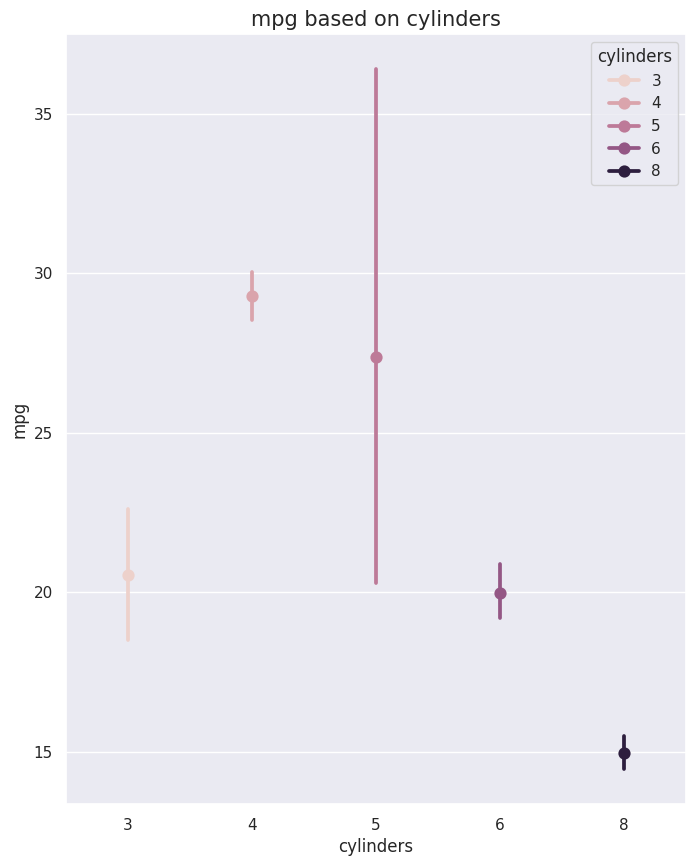

In [41]:
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='cylinders', y='mpg',
                   data=auto_mpg, hue='cylinders')
g1.set_title("mpg based on cylinders", fontsize=15)
g1.set_xlabel("cylinders")
g1.set_ylabel("mpg", fontsize=12)
plt.show()

 ### Missing Value Analysis

 #### Numeric Features

In [35]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
mpg,0,0.0
cylinders,0,0.0
displacement,0,0.0
weight,0,0.0
acceleration,0,0.0
model year,0,0.0
origin,0,0.0


#### Missing values for all numeric features in Bar chart Representation

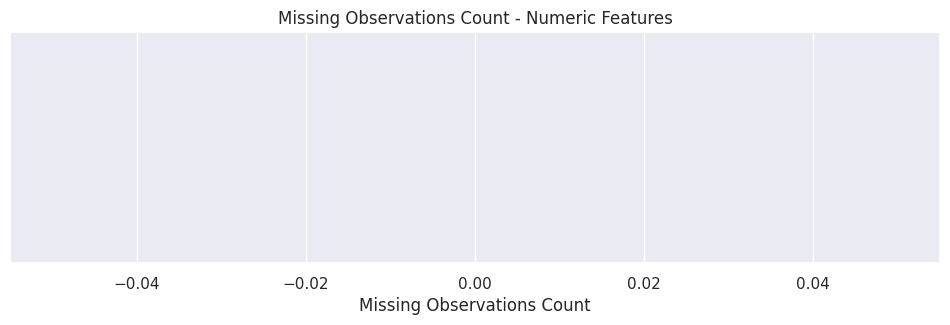

In [36]:
missing_values = numeric_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()


#### Categorical Features

In [37]:
total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
horsepower,0,0.0
car name,0,0.0


#### Missing values for  Categorical features in Bar chart Representation

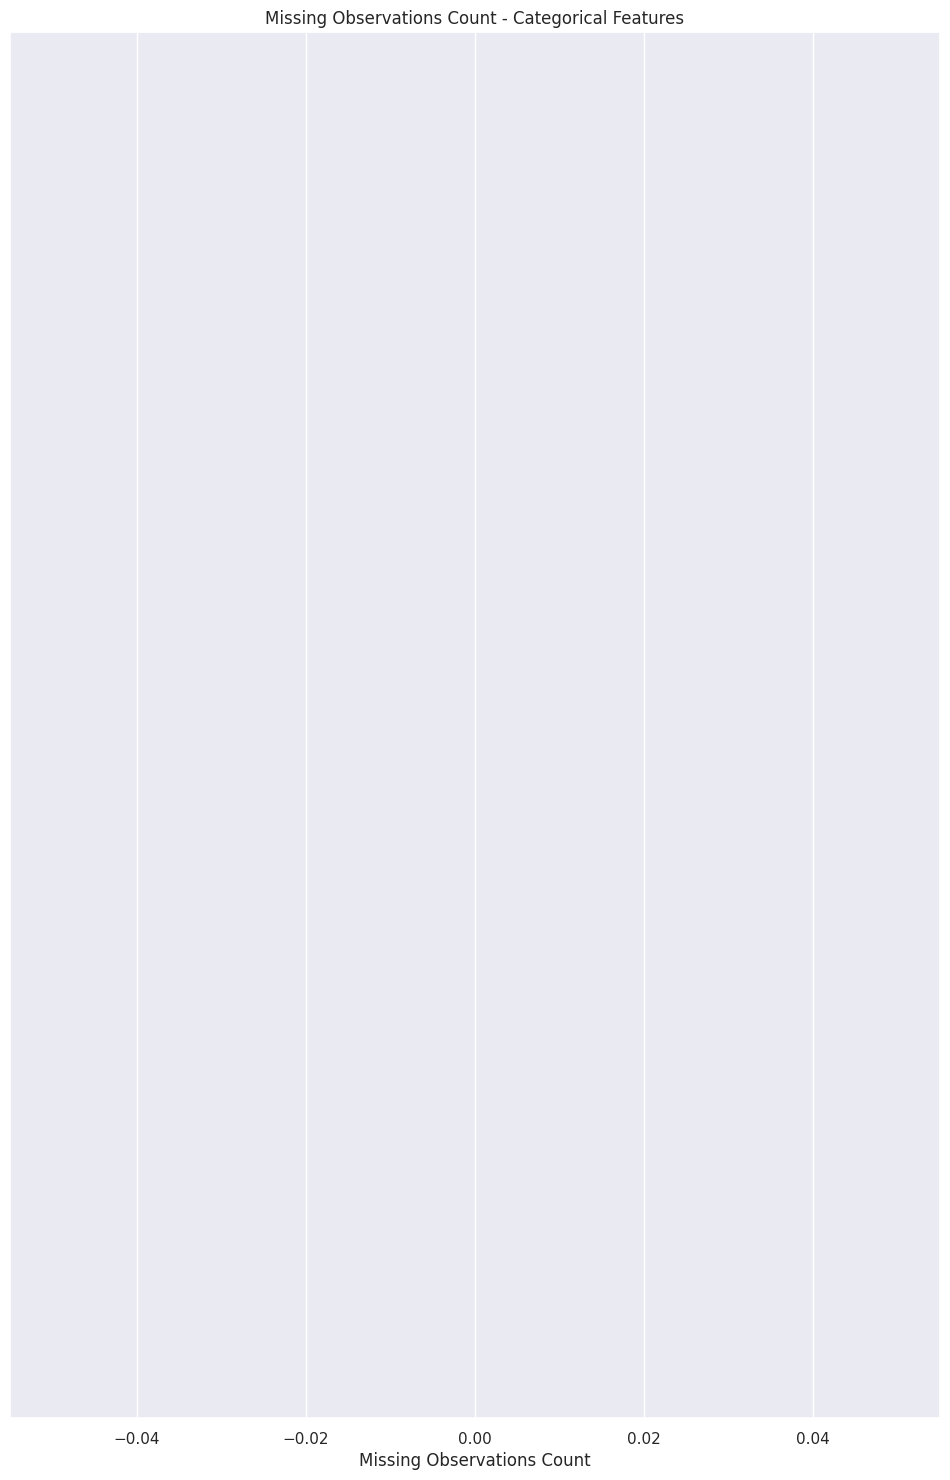

In [38]:
missing_values = categorical_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_values.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()

### Categorical Feature Exploration

In [40]:
for column_name in auto_mpg.columns:
    if auto_mpg[column_name].dtypes == 'object':
        auto_mpg[column_name] = auto_mpg[column_name].fillna(auto_mpg[column_name].mode().iloc[0])
        unique_category = len(auto_mpg[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))

Feature 'horsepower' has '94' unique categories
Feature 'car name' has '305' unique categories
